## El módulo os: acceso al sistema operativo

### El módulo os.path

Este submódulo está pensado para realizar operaciones con el sistema de archivos
que sean multiplataforma. Por ejemplo, define la variable `os.path.sep` que será el caracter usado a nivel del sistema operativo para separar las rutas o `paths`. Según la plataforma sobre la que estemos ejecutando Python, valdra un caracter yu otro; en windows esrá la barra imnvertida '\', en linux/unix/mac se usa la barra normañ: `/`.
    
    

In [1]:
import os 
os.path.sep

'/'

Podemos crear una ruta de directorio a partir de los nombres de las carpetas y el fichero final, usando la función `os.path.join`:

In [2]:
os.path.join('one', 'two', 'three.txt')

'one/two/three.txt'

la  función `os.path.split` divide una ruta en dos partes; la segunda es el último comoponente de la ruta, y la primnera es todo lo que viene antes:

In [3]:
os.path.split('one/two/trhee.txt')

('one/two', 'trhee.txt')

Si solo nos interesa la segunda parte, podemos usar `os.path.basename`:

In [4]:
os.path.basename('one/two/trhee.txt')

'trhee.txt'

Y si solo nos interesa la primera, usamos `os.path.dirname`:


In [5]:
os.path.dirname('one/two/trhee.txt')

'one/two'

Si lo que nos interesa es la extensión de nombre del archivo, existe `os.path.splitext`:
    

In [6]:
os.path.splitext('one/two/trhee.txt')

('one/two/trhee', '.txt')

### Marcas temporales y otros datos asociadas a los ficheros

La función `os.path.getsize()` nos devuelve el tamaño, en bytes, que ocupa un archivo.

Hay funciones que nos permiten saber cuando se creó un 
archivo (`os.path.getctime`), cuando fue leido por última vez (`os.path.getatime`)
y cuando fue modificado por última vez (`os.path.getctime`).

Todas estas funciones devuelve este tiempo en un formato conocido como [**Tiempo Unix**, **Unix epoch** o **Tiempo POSIX**](https://es.wikipedia.org/wiki/Tiempo_Unix), que es el número de segundos que han pasado desde la medianoche UTC del 1 de enero de 1970. Podemos pasar de este dato, un tanto incómodo, en un tipo de datos llamado `datetime`, mucho más cómodo:

podemos definir una función para realizar esta conversión, que le pasemos un enoch y nos devuelva una cadena de texto más agradable para nosotros:

In [7]:
def to_date(f):
    dt = datetime.datetime.fromtimestamp(f)
    return dt.strftime('%A, %d de %m de %Y, a las %H:%M:%S')

Este fichero se llama `os.ipynb`, vamos a obtener toda la información anterior:

In [8]:
import os
import datetime

filename = 'os.ipynb'
print('Tamaño (bytes):', os.path.getsize(filename))
print('Creado el:', to_date(os.path.getctime(filename)))
print('Accedido por última vez el:', to_date(os.path.getatime(filename)))
print('Modificado por última ve el:', to_date(os.path.getmtime(filename)))


Tamaño (bytes): 151283
Creado el: Friday, 13 de 04 de 2018, a las 14:30:34
Accedido por última vez el: Friday, 13 de 04 de 2018, a las 14:30:34
Modificado por última ve el: Friday, 13 de 04 de 2018, a las 14:30:34


También podemos comprobar si un fichero existe (o no) con las llamada
`os.path.exists`, y también podemos determinar si una ruta determinada
es un archivo o un directorio con `isfile` e `isdir`.

La función `os.listdir` nos devuelve una lista de ficheros dentro de un 
directorio. Podemos especificar ell directorio actual con el caracter `.`. Vamos a hacer un programa que liste los archivos. indicando con una D si son directorios, y ademas pondremos el tamaño en el caso de que sean archivos:

In [9]:
for fn in sorted(os.listdir('.')):
    if os.path.isdir(fn):
        print('D  ', end='')
    else:
        print('   ', end='')
    print(fn, end=' ')
    if os.path.isfile(fn):
        tam = os.path.getsize(fn)
        if tam < 1024:
            print(tam, 'bytes', end='')
        else:
            print(tam//1024, 'Kb', end='')
    print()

D  .cache 
D  .git 
   .gitignore 178 bytes
D  .ipynb_checkpoints 
   .travis.yml 80 bytes
   001_numeros.ipynb 5 Kb
   002_variables.ipynb 5 Kb
   003_listas.ipynb 10 Kb
   004_matplot.ipynb 73 Kb
   005_bucles.ipynb 12 Kb
   006_strings.ipynb 21 Kb
   007_if.ipynb 9 Kb
   008_booleans.ipynb 6 Kb
   009_while.ipynb 22 Kb
   010_ficheros.ipynb 19 Kb
   012_matplotlib.ipynb 242 Kb
   013_pandas.ipynb 190 Kb
   50_mymagic.py 1 Kb
   CONTRIBUTING.md 1 Kb
   Ejemplos.ipynb 3 Kb
   Gruntfile.js 3 Kb
   Intro.ipynb 1 Kb
   Introduccion-a-jupyter.ipynb 13 Kb
   LICENSE 1 Kb
   Primeros-pasos.ipynb 23 Kb
   README.md 46 Kb
   Sorteo.ipynb 3 Kb
   Untitled.ipynb 567 bytes
   Untitled1.ipynb 2 Kb
   Untitled2.ipynb 1 Kb
   Voronoi.ipynb 3 Kb
D  __pycache__ 
D  art 
   beatbox.py 101 bytes
   bower.json 523 bytes
   cesar.py 985 bytes
   coords.py 3 Kb
   cortinilla-v.py 1 Kb
   count_words.ipynb 1 Kb
D  css 
   custom_magics.md 3 Kb
D  data 
   demo.html 15 Kb
   estatutos.py 995 bytes
   hide_m

### Recorrer un arbol de directorio con os.path.walk

Existe una función en el módulo `os` que nos permite recorrer muy facilmente todo en arbol de directorios. La función se llama `os.walk`, acepta como parámetro 
de entrada un directorio y funciona devolviendo, por cada carpeta que encuentre, una tupla de tres elementos:

1) La ruta de la carpeta

2) La lista de las subcapretas que contienen

3) La lista de ficheros que contien

Por ejemplo, el siguiente listado recorre todas las carpetas buscando ficheros con la extensión '.pdf' y nos informa de cuantos ha encontrado:

In [10]:
count = 0
for (dir_name, dirs, filenames) in os.walk('../..'):
    for fn in filenames:
        if fn.lower().endswith('.pdf'):
            count = count + 1
print('Tienes {} fiehcos de tipo PDF en tu disco duro'.format(count))

Tienes 5692 fiehcos de tipo PDF en tu disco duro


## Como usar los diccionarios tipo Counter

In [11]:
from collections import Counter

c = Counter('Murcielago Murciano')
print(c)

Counter({'u': 2, 'a': 2, 'r': 2, 'i': 2, 'o': 2, 'c': 2, 'M': 2, ' ': 1, 'l': 1, 'n': 1, 'g': 1, 'e': 1})


In [12]:
c = Counter(['pdf', 'gif', 'gif', 'jpg', 'txt'])
print(c)

Counter({'gif': 2, 'pdf': 1, 'jpg': 1, 'txt': 1})


In [13]:
c.update(['pdf', 'pdf', 'pdf'])
print(c)

Counter({'pdf': 4, 'gif': 2, 'jpg': 1, 'txt': 1})


In [14]:
## Buscar tipos de archivos por extension

In [15]:
from collections import Counter

def get_ext(fn):
    _, ext = os.path.splitext(fn)
    return ext.lower()

count = Counter()
for (dir_name, dirs, filenames) in os.walk('..'):
    count.update([get_ext(f) for f in filenames])
print(count.items())

dict_items([('', 1655), ('.mk', 42), ('.status', 2), ('.font', 1), ('.debugsymbols', 1), ('.desktop', 3), ('.tscn~', 1), ('.aidl', 3), ('.cl', 26), ('.py', 1956), ('.sublime-workspace', 1), ('.scn', 14), ('.gif', 759), ('.flv', 5), ('.psp', 5), ('.phaseroots', 11), ('.sln', 3), ('.blend1', 1), ('.out', 4), ('.whl', 18), ('.pc', 1), ('.po', 176), ('.dat', 2), ('.ini', 13), ('.lib', 5), ('.lis', 1), ('.xcscheme', 1), ('.zip', 37), ('.bib', 1), ('.hx', 1), ('.php', 2), ('.a', 19), ('.vs', 7), ('.rst', 696), ('.h', 2420), ('.internal', 27), ('.pyc', 1300), ('.doc', 13), ('.jpg', 5248), ('.odt', 2), ('.js', 369), ('.cc', 7), ('.xcf', 48), ('.fncache', 3), ('.dae', 4), ('.readme', 1), ('.bmp', 16), ('.jar', 1), ('.graffle', 1), ('.sublime-project', 1), ('.wsgi', 3), ('.cmake', 94), ('.sfd', 1), ('.xls', 1), ('.swf', 16), ('.mp3', 37), ('.csv', 18), ('.dox', 14), ('.material', 18), ('.strings', 1), ('.hdr', 5), ('.pbxproj', 1), ('.icns', 2), ('.mar', 1), ('.sqlite', 1), ('.idx', 32), ('.bin',

<Container object of 30 artists>

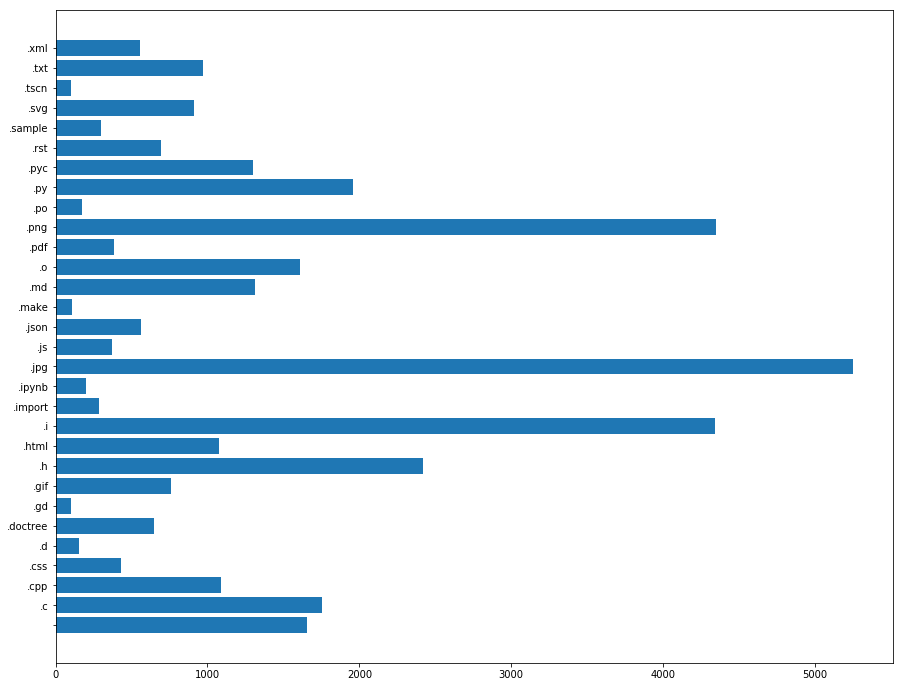

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt

data = {k: count[k] for k in count if count[k] > 100}
plt.figure(figsize=(15, 12))
plt.barh(list(data.keys()), list(data.values()))